In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statsmodels.formula.api as sm
import statsmodels.api as smf
%matplotlib inline

In [2]:
from Parameters import *
from Run_LCA_model import Run_LCA_model

In [3]:
buildings_path = '..\shapefiles\\building_block_people_WGS_3_int.csv'
schedule = 'scheduled' 
logistics = 'grid'
n_collection = 1
Result_Energy_m3 = pd.DataFrame()
Result_GHG_m3 = pd.DataFrame()
Result_COST_m3 = pd.DataFrame()
i=2
while i < 100:
    n_regen = i
    Total_Energy_m3, Total_GHG_m3, Total_COST_m3= Run_LCA_model(buildings_path, n_regen, n_collection, schedule, logistics)
    Result_Energy_m3 = Result_Energy_m3.append(Total_Energy_m3)
    Result_GHG_m3 = Result_GHG_m3.append(Total_GHG_m3)
    Result_COST_m3 = Result_COST_m3.append(Total_COST_m3)
    print (i)
    if i<10:
        i = i + 2
    else:
        i = i+10

Start calculating distances for scheduled...
calc distances took time 11.194714069366455
2
Start calculating distances for scheduled...
calc distances took time 15.290136575698853
4
Start calculating distances for scheduled...
calc distances took time 18.589430570602417
6
Start calculating distances for scheduled...
calc distances took time 24.688944816589355
8
Start calculating distances for scheduled...
calc distances took time 23.599758863449097
10
Start calculating distances for scheduled...
calc distances took time 21.410685539245605
20
Start calculating distances for scheduled...
calc distances took time 21.662495851516724
30
Start calculating distances for scheduled...
calc distances took time 22.085098028182983
40
Start calculating distances for scheduled...
calc distances took time 22.606276750564575
50
Start calculating distances for scheduled...
calc distances took time 22.289313077926636
60
Start calculating distances for scheduled...
calc distances took time 21.19838070869

In [4]:
Result_Energy_m3["sum"] = (Result_Energy_m3.sum(axis=1)) - Result_Energy_m3["n_facilities"]
Result_GHG_m3["sum"] = (Result_GHG_m3.sum(axis=1)) - Result_GHG_m3["n_facilities"]
Result_COST_m3["sum"] = (Result_COST_m3.sum(axis=1)) - Result_COST_m3["n_facilities"]

Result_Energy_m3 = pd.read_csv('Energy_result.csv')
Result_GHG_m3 = pd.read_csv('GHG_result.csv')

Result_Energy_m3=pd.read_csv('Energy_result_unscheduled.csv')
Result_GHG_m3=pd.read_csv('GHG_result_unscheduled.csv')

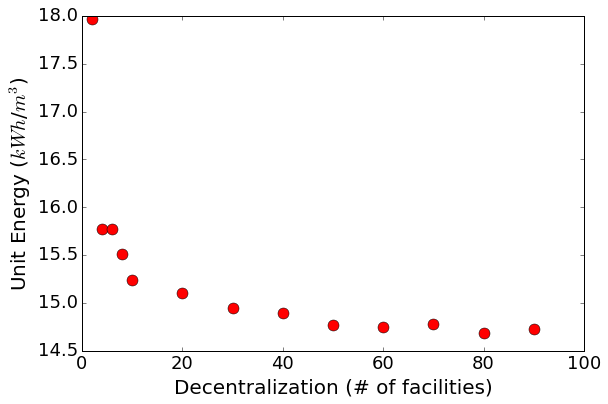

In [5]:
fig = plt.figure(figsize=(9,6))
plt.plot(Result_Energy_m3["n_facilities"], Result_Energy_m3["sum"], 'ro', markersize=11)
plt.xticks(fontsize = 18)
plt.xlim(0,100)
#plt.ylim(50,100)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)
plt.yticks(fontsize = 18)
plt.ylabel('Unit Energy ($kWh$/$m^3$)', fontsize = 20)

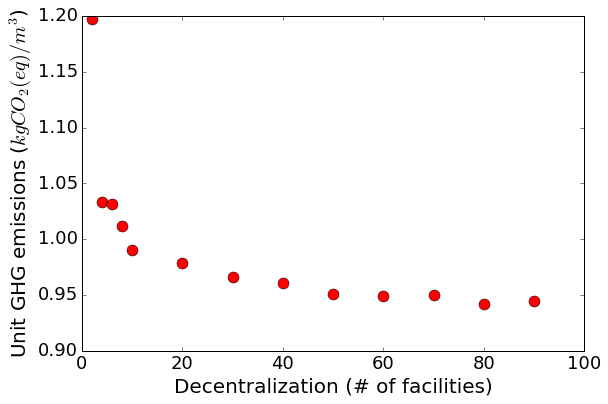

In [6]:
fig = plt.figure(figsize=(9,6))
plt.plot(Result_GHG_m3["n_facilities"], Result_GHG_m3["sum"], 'ro', markersize=11)
plt.xticks(fontsize = 18)
plt.xlim(0,100)
#plt.ylim(3.5,4.5)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)
plt.yticks(fontsize = 18)
plt.ylabel('Unit GHG emissions ($kgCO_2(eq)/m^3$)', fontsize = 20)

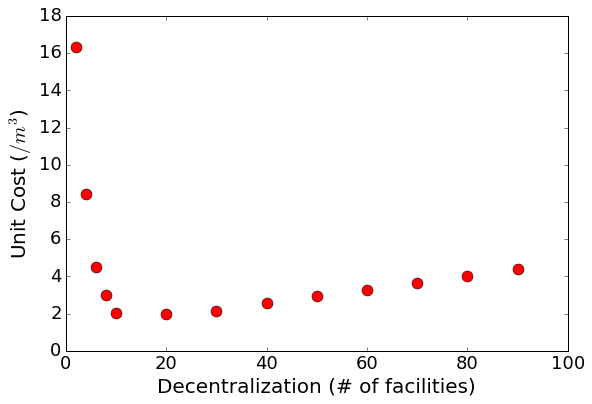

In [7]:
fig = plt.figure(figsize=(9,6))
plt.plot(Result_COST_m3["n_facilities"], Result_COST_m3["sum"], 'ro', markersize=11)
plt.xticks(fontsize = 18)
plt.xlim(0,100)
#plt.ylim(3.5,4.5)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)
plt.yticks(fontsize = 18)
plt.ylabel('Unit Cost ($/m^3$)', fontsize = 20)

In [8]:
Result_COST_m3

,Resin manufacturing,Resin transport,Catridge manufacturing,Catridge transport,Tank manufacturing,Tank transport,Pump operation,Pump manufacturing,Pump transport,Acid manufacturing,Acid transport,Logistics_regen,trucks manufacturing,facility space,Logistics_collect,Facilities_space_new,n_facilities,sum
0,6.919206,0.000375,0.164193,0.000014,0.000260,0.000014,0.000183,0.001851,0.000070,5.597668,0.000703,1.283020,2.051611,0.102951,0.001143,0.205902,2,16.329165
0,3.749605,0.000488,0.131875,0.000018,0.000196,0.000018,0.000165,0.001409,0.000092,3.015292,0.000916,0.724248,0.556248,0.048634,0.001223,0.194538,4,8.424965
0,1.804800,0.000676,0.112044,0.000025,0.000158,0.000025,0.000206,0.001644,0.000127,1.430796,0.001268,0.580400,0.257594,0.041140,0.001203,0.246843,6,4.478950
0,1.024676,0.000891,0.104090,0.000033,0.000143,0.000033,0.000258,0.001987,0.000167,0.795204,0.001671,0.531975,0.186528,0.039012,0.001140,0.312093,8,2.999902
0,0.492197,0.001356,0.098660,0.000051,0.000134,0.000051,0.000375,0.002775,0.000254,0.361377,0.002543,0.483357,0.158715,0.038055,0.001490,0.380551,10,2.021942
0,0.300434,0.002294,0.096705,0.000086,0.000132,0.000086,0.000611,0.004378,0.000430,0.205142,0.004302,0.454130,0.117492,0.037466,0.001730,0.749310,20,1.974729
0,0.228475,0.003455,0.095971,0.000130,0.000133,0.000130,0.000904,0.006366,0.000648,0.146514,0.006478,0.430931,0.095551,0.037055,0.001971,1.111636,30,2.166347
0,0.245807,0.004834,0.096148,0.000181,0.000136,0.000181,0.001251,0.008729,0.000906,0.160635,0.009064,0.419433,0.099882,0.036721,0.002211,1.468849,40,2.554968
0,0.260283,0.006439,0.096296,0.000241,0.000139,0.000241,0.001656,0.011481,0.001207,0.172429,0.012073,0.402228,0.096632,0.036492,0.002453,1.824618,50,2.924907
0,0.259651,0.007237,0.096289,0.000271,0.000140,0.000271,0.001857,0.012851,0.001357,0.171914,0.013570,0.396159,0.095796,0.036397,0.002702,2.183806,60,3.280268


In [12]:
Result_Energy_m3_plot = Result_Energy_m3.drop('sum',1).drop('n_facilities',1)
Result_GHG_m3_plot = Result_GHG_m3.drop('sum',1).drop('n_facilities',1)
Result_COST_m3_plot = Result_COST_m3.drop('sum',1).drop('n_facilities',1)

In [13]:
Result_Energy_m3_plot['other'] = (Result_Energy_m3_plot['Resin transport'] + Result_Energy_m3_plot['Catridge transport']+
                                  Result_Energy_m3_plot['Tank transport'] + Result_Energy_m3_plot['Pump transport'] +
                                  Result_Energy_m3_plot['Acid transport']+ Result_Energy_m3_plot['Tank manufacturing'] +
                                 Result_Energy_m3_plot['Pump manufacturing'])
Result_GHG_m3_plot['other'] = (Result_GHG_m3_plot['Resin transport'] + Result_GHG_m3_plot['Catridge transport']+
                                  Result_GHG_m3_plot['Tank transport'] + Result_GHG_m3_plot['Pump transport'] +
                                  Result_GHG_m3_plot['Acid transport'] + Result_GHG_m3_plot['Tank manufacturing'] +
                                 Result_GHG_m3_plot['Pump manufacturing'])
Result_COST_m3_plot['other'] = (Result_COST_m3_plot['Resin transport'] + Result_COST_m3_plot['Catridge transport']+
                                  Result_COST_m3_plot['Tank transport'] + Result_COST_m3_plot['Pump transport'] +
                                  Result_COST_m3_plot['Acid transport'] + Result_COST_m3_plot['Tank manufacturing'] +
                                 Result_COST_m3_plot['Pump manufacturing'])

Result_Energy_m3_plot = Result_Energy_m3_plot.drop(['Resin transport', 'Catridge transport', 
                                                    'Tank transport', 'Pump transport', 'Acid transport', 'Tank manufacturing',
                                                   'Pump manufacturing'] , 1)
Result_GHG_m3_plot = Result_GHG_m3_plot.drop(['Resin transport', 'Catridge transport', 
                                                    'Tank transport', 'Pump transport', 'Acid transport', 'Tank manufacturing',
                                                   'Pump manufacturing'] , 1)
Result_COST_m3_plot = Result_COST_m3_plot.drop(['Resin transport', 'Catridge transport', 
                                                    'Tank transport', 'Pump transport', 'Acid transport', 'Tank manufacturing',
                                                   'Pump manufacturing'] , 1)

In [14]:
Result_Energy_m3_plot_low = Result_Energy_m3_plot[0:1]
Result_GHG_m3_plot_low = Result_GHG_m3_plot[0:1]
Result_COST_m3_plot_low = Result_COST_m3_plot[0:1]
Result_Energy_m3_plot_high = Result_Energy_m3_plot[8:9]
Result_GHG_m3_plot_high = Result_GHG_m3_plot[8:9]
Result_COST_m3_plot_high = Result_COST_m3_plot[8:9]

(array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8]),
 <a list of 10 Text yticklabel objects>)

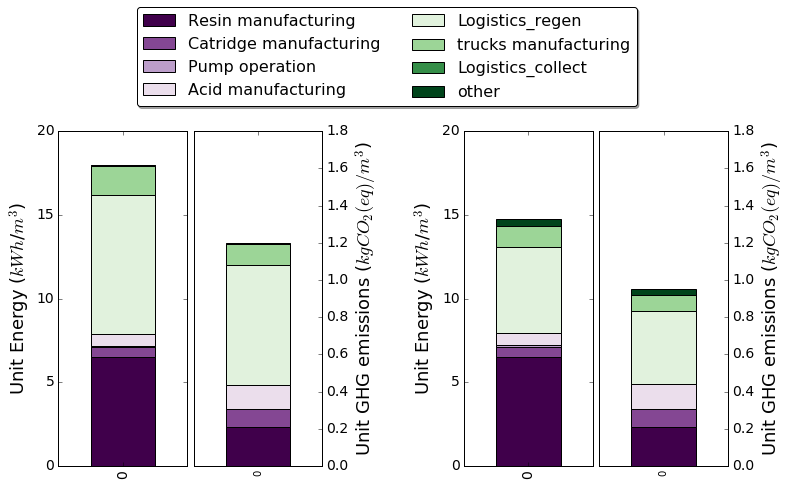

In [15]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1,5, 1)
a=Result_Energy_m3_plot_low.plot(kind='bar', stacked = True, ax=ax, legend=False,colormap='PRGn')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 20)
plt.ylabel('Unit Energy ($kWh$/$m^3$)',fontsize=18)
ax = fig.add_subplot(1,5, 2)
b=Result_GHG_m3_plot_low.plot(kind='bar', stacked = True, secondary_y=True, ax=ax, legend=False,colormap='PRGn')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 1.8)
plt.ylabel('Unit GHG emissions ($kgCO_2(eq)/m^3$)',fontsize=18)
b.legend(loc='lower center', bbox_to_anchor=(1.5, 1.05),ncol=2, fancybox=True, shadow=True,fontsize=16)
ax = fig.add_subplot(1,5, 4)
c=Result_Energy_m3_plot_high.plot(kind='bar', stacked = True,ax=ax, legend=False,colormap='PRGn')
plt.ylim(0, 20)
plt.ylabel('Unit Energy ($kWh$/$m^3$)',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax = fig.add_subplot(1,5, 5)
d=Result_GHG_m3_plot_high.plot(kind='bar', stacked = True, ax=ax, secondary_y=True, legend=False,colormap='PRGn')
plt.ylim(0, 1.8)
#fig.tight_layout()
plt.ylabel('Unit GHG emissions ($kgCO_2(eq)/m^3$)',fontsize=18)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=None)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [ ]:
Result_Energy_m3.to_csv('../results/Energy_m3_%s.csv'% (logistics)) 
Result_GHG_m3.to_csv('../results/GHG_m3_%s.csv'% (logistics)) 
Result_COST_m3.to_csv('../results/COST_m3_%s.csv'% (logistics)) 

In [ ]:
Energy_optimal = pd.read_csv('../results/Energy_m3_optimal.csv')
Energy_grid = pd.read_csv('../results/Energy_m3_grid.csv')
Energy_random = pd.read_csv('../results/Energy_m3_random.csv')
GHG_optimal = pd.read_csv('../results/GHG_m3_optimal.csv')
GHG_grid = pd.read_csv('../results/GHG_m3_grid.csv')
GHG_random = pd.read_csv('../results/GHG_m3_random.csv')
#COST_optimal = pd.read_csv('../results/COST_m3_optimal.csv')
#COST_grid = pd.read_csv('../results/COST_m3_grid.csv')
#COST_random = pd.read_csv('../results/COST_m3_random.csv')

In [ ]:
Energy_optimal_log= Energy_optimal
Energy_optimal_log['logx'] = np.log(Energy_optimal_log['n_facilities'])
Energy_optimal_log['logEnergy'] = np.log(Energy_optimal_log['sum'])
energy_optimal = np.array(Energy_optimal_log['logEnergy'])
scale_optimal = np.array(Energy_optimal_log['logx'])

Energy_grid_log= Energy_grid
Energy_grid_log['logx'] = np.log(Energy_grid_log['n_facilities'])
Energy_grid_log['logEnergy'] = np.log(Energy_grid_log['sum'])
energy_grid = np.array(Energy_grid_log['logEnergy'])
scale_grid = np.array(Energy_grid_log['logx'])

Energy_random_log= Energy_random
Energy_random_log['logx'] = np.log(Energy_random_log['n_facilities'])
Energy_random_log['logEnergy'] = np.log(Energy_random_log['sum'])
energy_random = np.array(Energy_random_log['logEnergy'])
scale_random = np.array(Energy_random_log['logx'])

GHG_optimal_log = GHG_optimal
GHG_optimal_log['logx'] = np.log(GHG_optimal_log['n_facilities'])
GHG_optimal_log['logGHG'] = np.log(GHG_optimal_log['sum'])
GHG_optimal = np.array(GHG_optimal_log['logGHG'])

GHG_grid_log= GHG_grid
GHG_grid_log['logx'] = np.log(GHG_grid_log['n_facilities'])
GHG_grid_log['logGHG'] = np.log(GHG_grid_log['sum'])
GHG_grid = np.array(GHG_grid_log['logGHG'])

GHG_random_log= GHG_random
GHG_random_log['logx'] = np.log(GHG_random_log['n_facilities'])
GHG_random_log['logGHG'] = np.log(GHG_random_log['sum'])
GHG_random = np.array(GHG_random_log['logGHG'])


In [ ]:
X_optimal = smf.add_constant(scale_optimal)
model = smf.OLS(energy_optimal , X_optimal)
results_optimal_energy = model.fit()

X_grid = smf.add_constant(scale_grid)
model = smf.OLS(energy_grid , X_grid)
results_grid_energy = model.fit()

X_random = smf.add_constant(scale_random)
model = smf.OLS(energy_random , X_random)
results_random_energy = model.fit()

X_optimal_GHG = smf.add_constant(scale_optimal)
model = smf.OLS(GHG_optimal , X_optimal_GHG)
results_optimal_GHG = model.fit()

X_grid_GHG = smf.add_constant(scale_grid)
model = smf.OLS(GHG_grid , X_grid_GHG)
results_grid_GHG = model.fit()

X_random_GHG = smf.add_constant(scale_random)
model = smf.OLS(GHG_random , X_random_GHG)
results_random_GHG = model.fit()

In [ ]:
x1 = np.linspace(0,100, 500) # 100 linearly spaced numbers
y1_optimal = (x1**(results_optimal_energy.params[1]))*math.exp(results_optimal_energy.params[0])
aa=list(zip(x1,y1_optimal))
pl_optimal=pd.DataFrame(aa)
pl_optimal.columns=['x','iso-distant']

y1_grid = (x1**(results_grid_energy.params[1]))*math.exp(results_grid_energy.params[0])
aa=list(zip(x1,y1_grid))
pl_grid=pd.DataFrame(aa)
pl_grid.columns=['x','grid']

y1_random = (x1**(results_random_energy.params[1]))*math.exp(results_random_energy.params[0])
aa=list(zip(x1,y1_random))
pl_random=pd.DataFrame(aa)
pl_random.columns=['x','random']

y1_optimal_GHG = (x1**(results_optimal_GHG.params[1]))*math.exp(results_optimal_GHG.params[0])
aa=list(zip(x1,y1_optimal_GHG))
pl_optimal_GHG=pd.DataFrame(aa)
pl_optimal_GHG.columns=['x','iso-distant']

y1_grid_GHG = (x1**(results_grid_GHG.params[1]))*math.exp(results_grid_GHG.params[0]) 
aa=list(zip(x1,y1_grid_GHG))
pl_grid_GHG=pd.DataFrame(aa)
pl_grid_GHG.columns=['x','grid']

y1_random_GHG = (x1**(results_random_GHG.params[1]))*math.exp(results_grid_GHG.params[0]) 
aa=list(zip(x1,y1_random_GHG))
pl_random_GHG=pd.DataFrame(aa)
pl_random_GHG.columns=['x','random']

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1 ,figsize=(8, 6))
f = pl_optimal.plot( x='x', y='iso-distant',fontsize=16, c='r', ax=ax, linewidth=4)
g = pl_grid.plot( x='x', y='grid',fontsize=16, c='b',linestyle='--', ax=ax, linewidth=4)
h = pl_random.plot( x='x', y='random',fontsize=16, c='g', ax=ax, linewidth=4)
h.legend(fontsize=18)
#plt.ylim(20,27)
plt.grid(which='major', color='grey', linestyle='--', alpha = 0.5)
plt.ylabel('Unit Energy ($kWh$/$m^3$)',fontsize=20)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1 ,figsize=(8, 6))
f = pl_optimal_GHG.plot( x='x', y='iso-distant',fontsize=16, c='r', ax=ax, linewidth=4)
g = pl_grid_GHG.plot( x='x', y='grid',fontsize=16, c='b',linestyle='--', ax=ax, linewidth=4)
h = pl_random_GHG.plot( x='x', y='random',fontsize=16, c='g', ax=ax, linewidth=4)
h.legend(fontsize=18)
#plt.ylim(1.35, 2)
plt.grid(which='major', color='grey', linestyle='--', alpha = 0.5)
plt.ylabel('Unit GHG emissions ($kgCO_2(eq)/m^3$)',fontsize=20)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)